<a href="https://colab.research.google.com/github/peterbmob/WP2pres/blob/main/fortnet_dftb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Create environment
# Conda is uninstalled every time you rehash yuor environment... 
#!conda --version
#If !conda --version returns no results, install conda with :
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...


In [7]:
!pip install fortnet-ase 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [3]:
!conda install mamba

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-22.11.1              |   py38h578d9bd_1         905 KB  conda-forge
    openssl-3.0.7              |       h0b41bf4_2         2.5 MB  conda-forge
    pluggy-1.0.0               |     pyhd8ed1ab_5          16 KB  conda-forge
    ruamel.yaml-0.17.21        |   py38h0a891b7_2         172 KB  conda-forge
    ruamel.yaml.clib-0.2.7     |   py38h1de0b5d_1         143 KB  conda-forge
    tq

In [94]:
#@Install MAMBA
!mamba install 'fortnet=*=nompi_*'


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['fortnet=[build=nompi_*]']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+

In [11]:
from google.colab import files
uploads= files.upload()

Saving DFTB_DB_train.db to DFTB_DB_train.db


In [112]:
def write_fnet_input(outfile, **kwargs):
   outfile.write('Network = BPNN { \n')
   outfile.write('  Hidden = 20 20 \n')
   outfile.write('  Activation = tanh \n')
   outfile.write('} \n')
   outfile.write(' \n')

   outfile.write('Features { \n')
   outfile.write('  Mapping = ACSF { \n')
   outfile.write('    Reduce = Yes \n')
   outfile.write('    Standardization = Yes \n')
   outfile.write('    Function = Auto {\n')
   outfile.write('      Rcut = 4.0 \n')
   outfile.write('      Nradial = 5 \n')
   outfile.write('      NAngular = 4 \n')
   outfile.write('    } \n')
   outfile.write('  } \n')
   outfile.write('} \n')
   outfile.write(' \n')

   outfile.write('Training = LBFGS { \n')
   outfile.write('  Threshold = 1e-8  \n')
   outfile.write('  NIterations = 15000 \n')
   outfile.write('  NPrintout = 1000 \n')
   outfile.write('  NSaveNet = 1000 \n')
   outfile.write('  MinDisplacement = 1e-10 \n')
   outfile.write('  MaxDispacement = 5e-02 \n')
   outfile.write('  LineMin = Yes \n')
   outfile.write('  Memory =1000 \n')
   outfile.write('  Loss = mse \n')
   outfile.write('} \n')
   outfile.write(' \n')

   outfile.write('Data {  \n')
   outfile.write('  Dataset = fnetdata.hdf5 \n')
   outfile.write('  Netstatfile ='+"'"+'fortnet.hdf5'+"'"+'\n') 
   outfile.write('} \n')
   outfile.write(' \n')

   outfile.write('Options { \n')
   outfile.write('  Mode = train \n')
   outfile.write('  ReadNetStats = Yes \n')
   outfile.write('  RandomSeed = 123456 \n')
   outfile.write('} \n')
   outfile.write(' \n')

def fnet_validate(outfile):
   outfile.write('Data {  \n')
   outfile.write('  Dataset = fnetdata.hdf5 \n')
   outfile.write('  Netstatfile = fortnet.hdf5 \n') 
   outfile.write('} \n')
   outfile.write(' \n')

   outfile.write('Options { \n')
   outfile.write('  Mode = validate \n')
   outfile.write('  ReadNetStats = Yes \n')
   outfile.write('} \n')
   outfile.write(' \n')  
   

In [115]:
from re import DEBUG
import os
import numpy as np
from fortformat import Fnetdata
from ase.db import connect
from ase.io import read, write
from ase.io.vasp import read_vasp, read_vasp_out

db_dft=connect('DFT_DB_train.db')
db_dftb=connect('DFTB_DB_train.db')
strucs = []
energies =  np.empty((len(db), 1))


ii=-1
for row in db.select():
  ii=ii+1
  atoms=row.toatoms()
  write('POSCAR',atoms)

  strucs.append(read_vasp(os.path.join('POSCAR')))
  energies[ii,0]= (row.energy-db_dftb.get("id="+str(row.id)).energy)

fnetdata = Fnetdata(atoms=strucs, globaltargets=energies)
fnetdata.dump('fnetdata.hdf5')



In [107]:
energies

array([[506.52482098],
       [506.19707964],
       [506.10104972],
       [505.61125582],
       [506.18231759],
       [506.42774117],
       [506.31872769],
       [506.08682132],
       [506.06218852],
       [505.89894274],
       [506.04828631],
       [506.08007212],
       [506.50015615],
       [506.54809224],
       [506.19612741],
       [506.00443923],
       [504.48570672],
       [506.2656665 ],
       [505.93955884],
       [506.3446004 ],
       [505.97851851],
       [506.36300485],
       [506.03627421],
       [506.12381661],
       [506.18845211],
       [505.65468624],
       [505.69979612],
       [506.59567394],
       [506.19183217],
       [505.69254223],
       [506.01136957],
       [506.47372317],
       [506.69256225],
       [506.58232299],
       [505.95427586],
       [506.04607602],
       [505.95207557],
       [505.83644548],
       [505.54366183],
       [506.16489081],
       [505.83176466],
       [506.41652128],
       [505.93602977],
       [506

In [104]:
ls

condacolab_install.log  DFT_DB_train.db  fortnet_pin.hsd  test.out
DFTB_DB.db              fnetdata.hdf5    output           validate/
DFTB_DB_train.db        fortnet.hdf5     POSCAR
DFT_DB.db               fortnet_in.hsd   sample_data/


In [113]:
with open('fortnet_in.hsd', 'w') as fd:
            write_fnet_input(fd)





In [116]:
!fnet | tee output 

|==============================================================================|
|  Fortnet - A BPNN Implementation, Version 0.7.2                              |
|                                                                              |
|  Copyright (C) 2020 - 2022  T. W. van der Heide                              |
|==============================================================================|

date: 05.02.2023
time: 21:43:02, +0000
Interpreting input file 'fortnet_in.hsd'
WARNING!
-> The following 3 node(s) have been ignored by the parser:
(1)
Path: fortnet/Network
Line: 1-4 (File: fortnet_in.hsd)
(2)
Path: fortnet/Features
Line: 6-16 (File: fortnet_in.hsd)
(3)
Path: fortnet/Training/LBFGS/MaxDispacement
Line: 24-24 (File: fortnet_in.hsd)

Checking Input Consistency...passed
Processed input written as HSD to 'fortnet_pin.hsd'

--------------------------------------------------------------------------------

Initialisation

running in training mode
random seed: 123456
read init

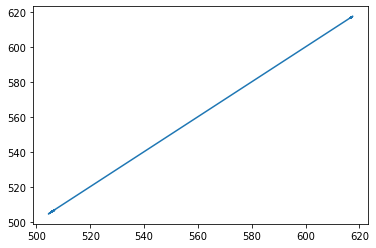

In [126]:
from ase.build import molecule
from fnetase import Fortnet
from ase import units

energies_ref=[]
energies_val=[]
for row in db.select():
    system = row.toatoms() 
    energies_ref.append(row.energy-db_dftb.get("id="+str(row.id)).energy)
    calc = Fortnet(label='test', atoms=system, restart='fortnet.hdf5')
    calc.calculate(atoms=system, properties=('energy', 'forces'))
    system.calc=calc
    energy = system.get_potential_energy()
    forces = system.get_forces()
    energies_val.append(energy/units.Hartree)


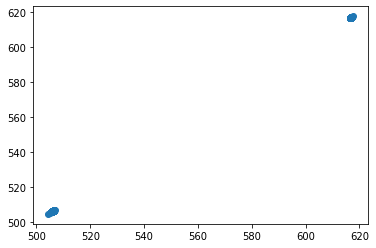

In [129]:
import matplotlib.pyplot as plt
plt.scatter(energies_ref,energies_val) 

In [74]:
import os
base = os.getcwd()
try: 
   os.mkdir('validate')
except:
  pass
os.chdir('validate')


In [84]:
with open('fortnet_in.hsd', 'w') as fd:
            fnet_validate(fd)

In [93]:
!fnet | tee output


|==============================================================================|
|  Fortnet - A BPNN Implementation, Version 0.7.2                              |
|                                                                              |
|  Copyright (C) 2020 - 2022  T. W. van der Heide                              |
|==============================================================================|

date: 05.02.2023
time: 21:11:02, +0000
Interpreting input file 'fortnet_in.hsd'
ERROR!
-> Selected running mode requires the dataset to hold target information.


In [92]:
cp ../fortnet.hdf5 .